# DeepTweets

## Introduction:
DeepTweets is a data science project focused on the classification of tweets into two categories: Politics and Sports. The project aims to develop a machine learning model that can accurately predict the category of a given tweet, enabling effective categorization and analysis of Twitter data.

## Exploratory Data Analysis
Before building the model, it is essential to perform exploratory data analysis (EDA) to gain insights into the dataset and answer key questions. Some of the important questions to consider during the analysis phase of the DeepTweets project include:

Data Overview:

- How many tweets are available in the dataset?
- What are the features (columns) present in the dataset?
- What is the distribution of tweets across different categories (Politics and Sports)?
- Are there any missing values or inconsistencies in the data?

Text Analysis:

- What are the common words or phrases in the tweets?
- Are there any special characters, hashtags, or URLs in the tweets that need preprocessing?

Class Imbalance:

- Is there a significant class imbalance between Politics and Sports tweets?
- If there is a class imbalance, how can we address it to ensure balanced model training?

Visualization:

- Can we visualize the distribution of tweet lengths, word frequencies, or other relevant statistics?
- Are there any visual patterns or trends that can be identified from the data?...

In [18]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

### Explore data

In [3]:
df_train.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...
1,304834304222064640,Politics,'@rraina1481 I fear so'
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...


In [4]:
df_train.shape

(6525, 3)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6525 entries, 0 to 6524
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetId    6525 non-null   int64 
 1   Label      6525 non-null   object
 2   TweetText  6525 non-null   object
dtypes: int64(1), object(2)
memory usage: 153.1+ KB


In [6]:
# check for missing values
df_train.isnull().sum()

TweetId      0
Label        0
TweetText    0
dtype: int64

In [7]:
# check for duplicates
df_train.duplicated().sum()

0

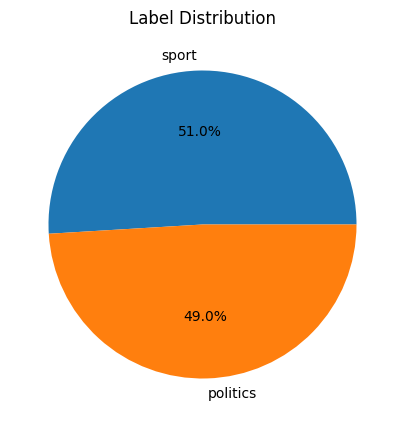

In [8]:
# visiualize the counts in a pie chart
plt.figure(figsize=(5, 5))
plt.pie(df_train['Label'].value_counts(), labels=['sport', 'politics'], autopct='%1.1f%%')
plt.title('Label Distribution')
plt.show()

The pie chart illustrates the label distribution in the training data. It shows that approximately 51.0% of the tweets are classified as 'Sports' while 49.0% are classified as 'Politics'. The distribution appears to be fairly balanced, indicating that the dataset contains a relatively equal number of tweets from both categories.

### Data preprocessing

Data preprocessing is a crucial step in our project as it prepares raw data for analysis and modeling. Techniques such as text cleaning, tokenization, removing stopwords, and lemmatization are applied to transform unstructured text into a structured and meaningful format. This process has multiple benefits. Firstly, it standardizes the text data by removing irrelevant information like HTML tags, URLs, and special characters. Secondly, it reduces data dimensionality by converting words to their base form and removing commonly occurring words, enhancing model efficiency and preventing overfitting. Additionally, data preprocessing enables exploratory data analysis, facilitating the generation of insightful visualizations like word clouds. The described preprocessing steps were adapted from the source : https://towardsdatascience.com/complete-guide-to-perform-classification-of-tweets-with-spacy-e550ee92ca79.

In [9]:
# import tweet_cleaner function from utils.py
from utils import clean_tweets

The function `clean_tweets` takes in a text and performs various preprocessing steps such as removing URLs, usernames, digits, expanding contractions, converting to lowercase, tokenizing, removing punctuation, lemmatizing, and removing stopwords. The function then returns the cleaned text as a string.

In [10]:
# apply the function to the tweet text
df_train['clean_text'] = df_train['TweetText'].apply(clean_tweets)

In [11]:
df_train.head()

,TweetId,Label,TweetText,clean_text
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...,seckerry value statedept usaid measured doll...
1,304834304222064640,Politics,'@rraina1481 I fear so',rraina fear
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...,watch video highlight wwc final australia west...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...,rt chelscanlan nitro circus albertpark theym...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...,cricketfox always good thing thanks feedback


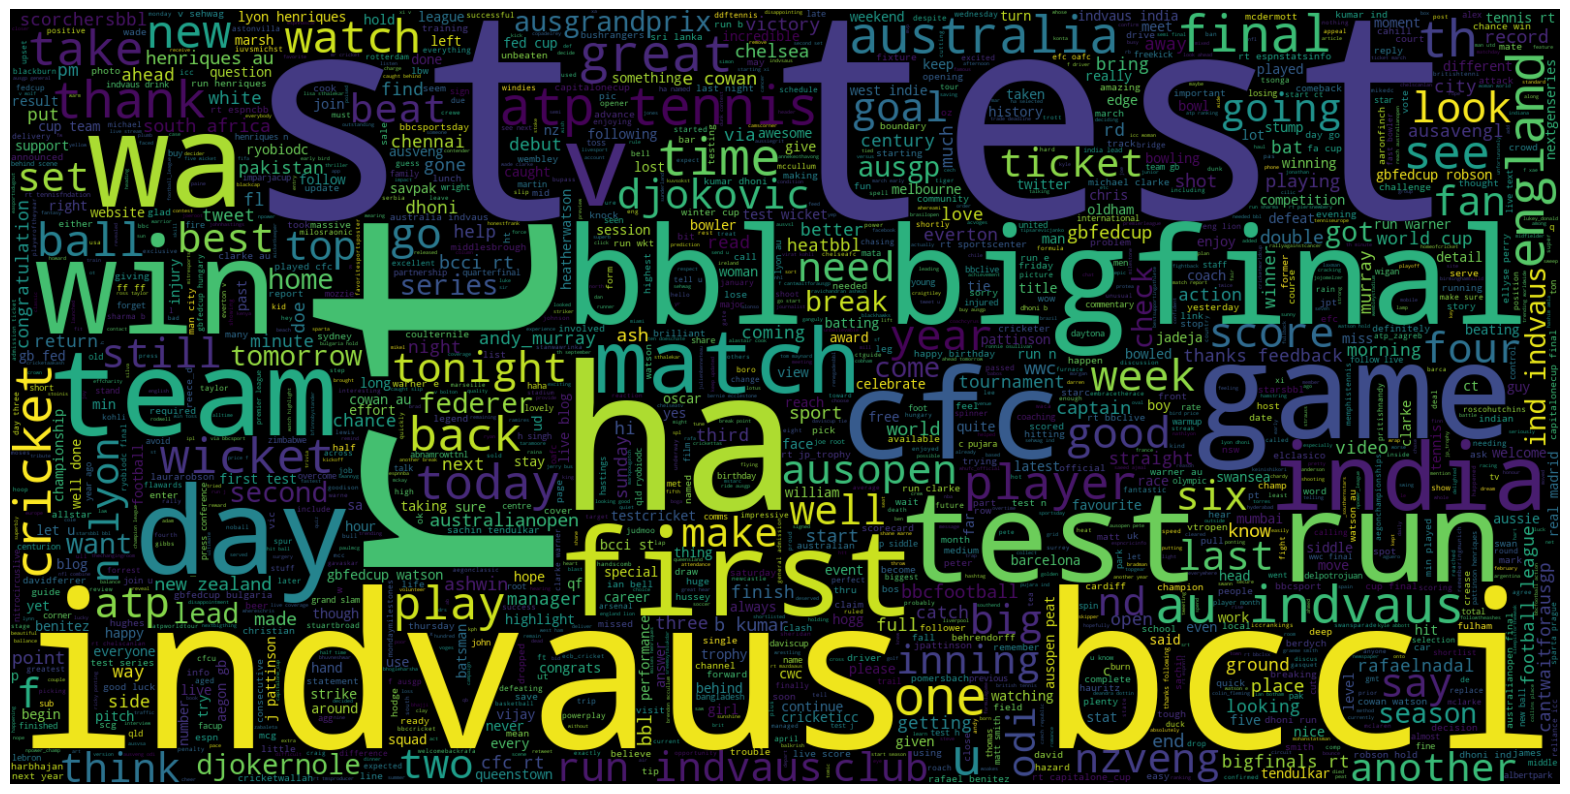

In [12]:
# visualize the most common words in the sport tweets
from wordcloud import WordCloud

plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=2000, width=1600, height=800).generate(" ".join(df_train[df_train['Label'] == "Sports"]['clean_text']))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

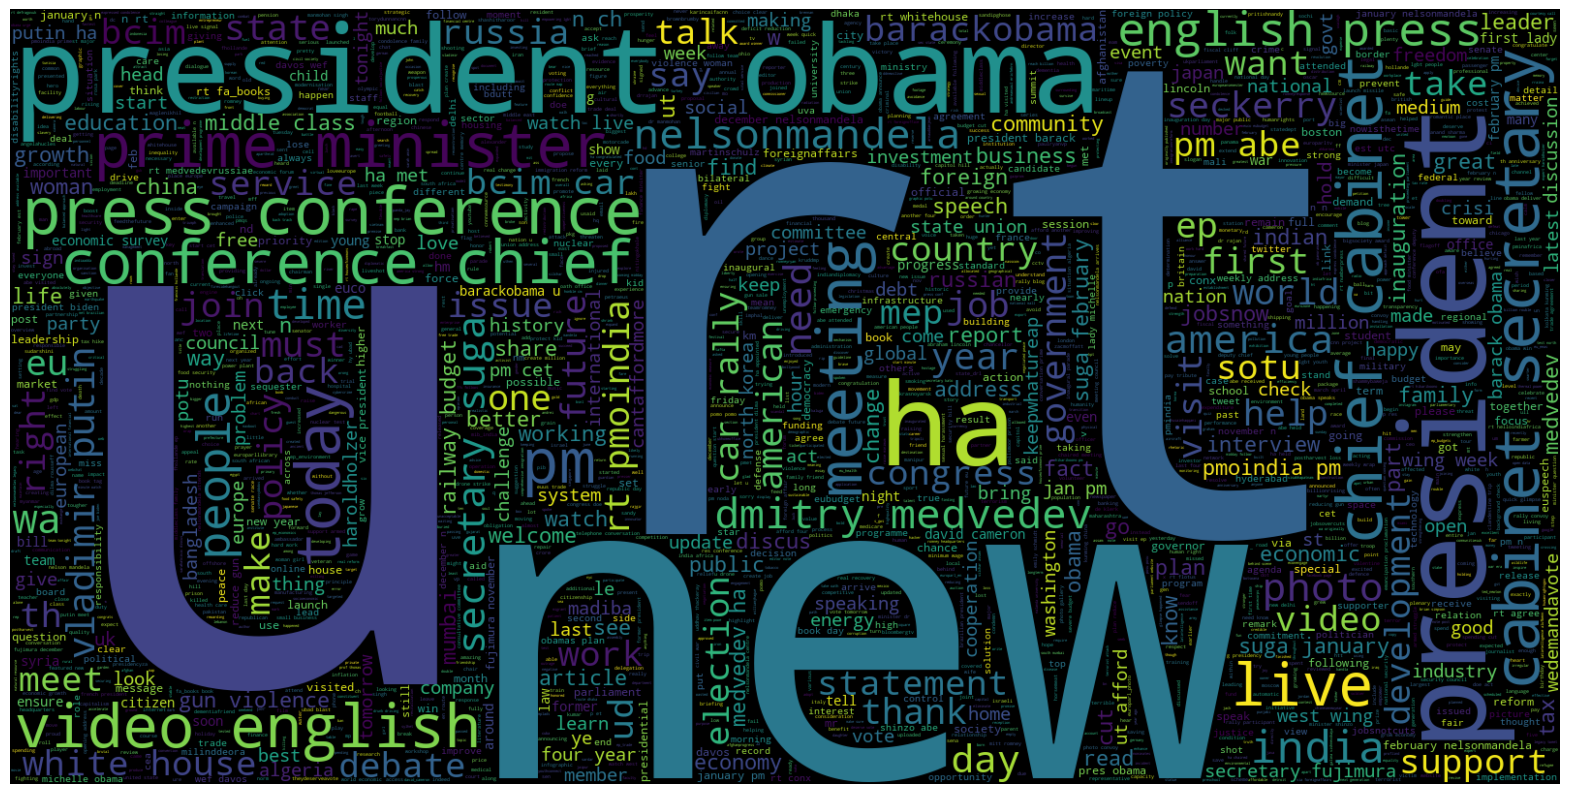

In [13]:
# visualize the most common words in the politics tweets
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=2000, width=1600, height=800).generate(" ".join(df_train[df_train['Label'] == "Politics"]['clean_text']))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
# import plot_top_n_words function from utils.py
from utils import plot_top_n_words

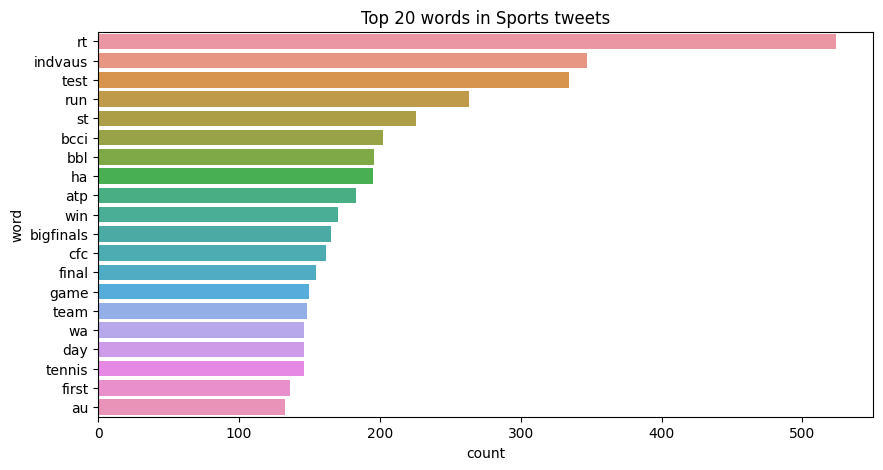

In [15]:
# displays the top 20 most frequent words in the "Sports" tweets
plot_top_n_words(df_train[df_train['Label'] == "Sports"]['clean_text'], 20, 'Top 20 words in Sports tweets')

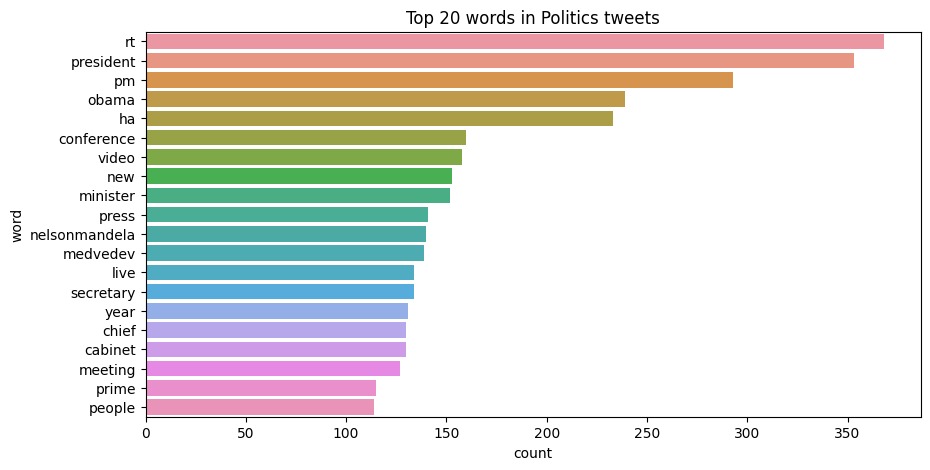

In [16]:
# displays the top 20 most frequent words in the "Politics" tweets
plot_top_n_words(df_train[df_train['Label'] == "Politics"]['clean_text'], 20, 'Top 20 words in Politics tweets')

The plots clearly demonstrate a noticeable difference in the words used in tweets related to different topics. In the "Sports" tweets, common words include sports-specific terms, player names, and game-related terms. On the other hand, the "Politics" tweets contain words related to political events, government, and policy discussions. This distinction in word usage highlights the contrasting nature of the two topics and confirms that the feature extraction process effectively captures the essence of each category.

C:\Users\ADS\AppData\Local\Temp\ipykernel_10332\1152370273.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[df_train['Label'] == "Sports"]['length'], label='Sports')
C:\Users\ADS\AppData\Local\Temp\ipykernel_10332\1152370273.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_trai

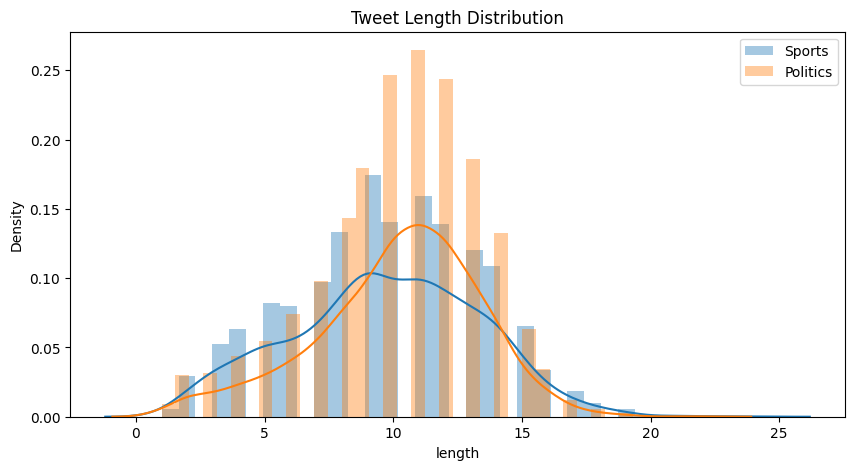

In [19]:
# check the length of the tweets
df_train['length'] = df_train['clean_text'].apply(lambda x: len(x.split()))

df_train.head()

# visualize the length of the tweets
plt.figure(figsize=(10, 5))
sns.distplot(df_train[df_train['Label'] == "Sports"]['length'], label='Sports')
sns.distplot(df_train[df_train['Label'] == "Politics"]['length'], label='Politics')
plt.legend()
plt.title('Tweet Length Distribution')
plt.show()

In [20]:
# check the maximum length of the sports tweets 
df_train[df_train['Label'] == "Sports"]['length'].describe()


count    3325.000000
mean        9.713985
std         3.696805
min         1.000000
25%         7.000000
50%        10.000000
75%        12.000000
max        24.000000
Name: length, dtype: float64

In [21]:
# check the maximum length of the Politics tweets 
df_train[df_train['Label'] == "Politics"]['length'].describe()

count    3200.000000
mean       10.212813
std         3.204701
min         1.000000
25%         8.000000
50%        11.000000
75%        12.000000
max        22.000000
Name: length, dtype: float64

In our analysis, we are investigating the relationship between tweet length and category in order to gain insights into the characteristics of tweets in the "Sports" and "Politics" categories. Based on these statistics, we can observe that the average tweet length for "Politics" tweets is marginally higher compared to "Sports" tweets. However, it is important to note that these findings are derived from a preliminary analysis, and further investigation and visualization techniques may be necessary to validate and deepen our understanding of the relationship between tweet length and category.

### Feature Extraction + Model Training

##### Feature Extraction:

In the context of the DeepTweets project, feature extraction refers to the process of converting raw text data (tweets) into numerical representations that can be used as input to machine learning models. Feature extraction is a crucial step in text classification tasks, as it transforms the text data into a format that can be understood and processed by the models.

Feature extraction techniques commonly used in text classification tasks include :

- CountVectorizer: This technique converts text documents into a matrix of token counts, where each row represents a document, and each column represents a unique word in the corpus. The cell values represent the frequency of each word in the corresponding document.

- TF-IDF (Term Frequency-Inverse Document Frequency): TF-IDF calculates the importance of a word in a document relative to the entire corpus. It considers both the frequency of the word in the document (term frequency) and its rarity across the entire corpus (inverse document frequency). TF-IDF assigns higher weights to words that are more relevant to a specific document.

##### Models:

For the DeepTweets project, we will work with the following models for tweet classification :

Logistic Regression:

- Logistic Regression is a simple and efficient model for binary classification.
- It works well with linearly separable data and can handle high-dimensional feature spaces.
- It provides interpretable coefficients that can indicate the importance of different features.

k-Nearest Neighbors (KNN):

- KNN is a non-parametric classification algorithm that works well with large datasets.
- It classifies samples based on their proximity to other samples in the feature space.
- KNN can capture complex relationships in the data and is robust to noisy data.

Linear SVM (Support Vector Machine):

- Linear SVM is a powerful classifier that finds an optimal hyperplane to separate data points.
- It works well in high-dimensional spaces and is effective in handling large datasets.
- SVMs can handle both linearly separable and non-linearly separable data using kernel trick.

Gradient Boosting Classifier:

- Gradient Boosting is an ensemble method that combines multiple weak learners (decision trees) to create a strong classifier.
- It sequentially improves the model by minimizing the loss function using gradient descent.
- Gradient Boosting can handle complex interactions between features and has high predictive accuracy.

Random Forest:

- Random Forest is an ensemble method that combines multiple decision trees to create a robust classifier.
- It reduces overfitting and improves generalization by averaging the predictions of individual trees.
- Random Forest is capable of handling high-dimensional data and is resistant to outliers and noisy data.

RidgeClassifier:

- RidgeClassifier is a linear classifier that uses ridge regression to handle multicollinearity in the data.
- It can effectively deal with correlated features and prevents overfitting.
- RidgeClassifier is suitable for cases where feature regularization is required.
 
Multinomial Naive Bayes (MNB):

- MNB is a probabilistic classifier based on the Bayes' theorem with the assumption of feature independence.
- It works well with discrete features, such as word counts or TF-IDF values.
- MNB is computationally efficient and has been successful in text classification tasks.

Perceptron:

- Perceptron is a linear classifier based on the artificial neural network model.
- It learns by updating the weights based on misclassified samples.
- Perceptron is fast and simple, suitable for online learning scenarios.

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, Perceptron
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import GridSearchCV
import time

In [29]:
# classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "k-Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(),
    'RidgeClassifier': RidgeClassifier(),
    'MNB': MultinomialNB(),
    'Perceptron': Perceptron()
}

In [30]:
X_train, X_valid, y_train, y_valid = train_test_split(df_train['clean_text'], df_train['Label'], test_size=0.2, random_state=42)

In [31]:
def train_models(X_train, y_train, X_valid, y_valid):
    # TF-IDF feature extraction
    tfidf_vectorizer = TfidfVectorizer()
    X_tfidf_train = tfidf_vectorizer.fit_transform(X_train)
    X_tfidf_valid = tfidf_vectorizer.transform(X_valid)

    # CountVectorizer feature extraction
    count_vectorizer = CountVectorizer()
    X_count_train = count_vectorizer.fit_transform(X_train)
    X_count_valid = count_vectorizer.transform(X_valid)

    # Initialize a list to store the model results
    results = []

    # Train the models with TF-IDF
    for clf_name, clf in classifiers.items():
        start_time = time.time()
        clf.fit(X_tfidf_train, y_train)
        y_pred = clf.predict(X_tfidf_valid)
        accuracy = accuracy_score(y_valid, y_pred)
        precision = precision_score(y_valid, y_pred, pos_label='Sports')  # Calculate precision for 'Sports' category
        recall = recall_score(y_valid, y_pred, pos_label='Sports')  # Calculate recall for 'Sports' category
        execution_time = time.time() - start_time
        results.append([clf_name, "TF-IDF", accuracy, precision, recall, execution_time])

    # Train the models with CountVectorizer
    for clf_name, clf in classifiers.items():
        start_time = time.time()
        clf.fit(X_count_train, y_train)
        y_pred = clf.predict(X_count_valid)
        accuracy = accuracy_score(y_valid, y_pred)
        precision = precision_score(y_valid, y_pred, pos_label='Sports')  # Calculate precision for 'Sports' category
        recall = recall_score(y_valid, y_pred, pos_label='Sports')  # Calculate recall for 'Sports' category
        execution_time = time.time() - start_time
        results.append([clf_name, "CountVectorizer", accuracy, precision, recall, execution_time])

    # Create a DataFrame with the results
    df_results = pd.DataFrame(results, columns=["Model", "Feature Extraction", "Accuracy", "Precision", "Recall", "Execution Time"])
    return df_results


In [32]:
results_df_imp = train_models(X_train, y_train, X_valid, y_valid)

In [33]:
# results_df_imp sorted by accuracy
results_df_imp.sort_values(by='Accuracy', ascending=False)

,Model,Feature Extraction,Accuracy,Precision,Recall,Execution Time
14,MNB,CountVectorizer,0.960153,0.954210,0.968516,0.024999
6,MNB,TF-IDF,0.957088,0.953938,0.962519,0.032752
2,Linear SVM,TF-IDF,0.951724,0.946746,0.959520,3.515871
0,Logistic Regression,TF-IDF,0.946360,0.943536,0.952024,0.211067
5,RidgeClassifier,TF-IDF,0.946360,0.946188,0.949025,0.062404
8,Logistic Regression,CountVectorizer,0.944061,0.934211,0.958021,0.192527
13,RidgeClassifier,CountVectorizer,0.942529,0.937870,0.950525,0.075714
10,Linear SVM,CountVectorizer,0.937931,0.913842,0.970015,3.924793
7,Perceptron,TF-IDF,0.933333,0.926471,0.944528,0.024615
1,k-Nearest Neighbors,TF-IDF,0.928736,0.923304,0.938531,0.246204


Overall, the MNB model performed exceptionally well in terms of accuracy, with a score of 96.02%. It achieved this accuracy while maintaining a relatively fast training time and a high recall rate. This suggests that the MNB model is a suitable choice for text classification tasks, providing a good balance between accuracy and efficiency.

In [41]:
# hyperparameter tuning for MNB with count vectorizer
# count vectorizer feature extraction
count_vectorizer = CountVectorizer()
X_count_train = count_vectorizer.fit_transform(X_train)
X_count_valid = count_vectorizer.transform(X_valid)

# hyperparameter tuning
param_grid1 = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0], 'fit_prior': [True, False]}
clf1 = MultinomialNB()
grid1 = GridSearchCV(clf1, param_grid1, cv=5, scoring='accuracy')
grid1.fit(X_count_train, y_train)

# best hyperparameter
best_params1 = grid1.best_params_
best_score1 = grid1.best_score_

# predict the labels for the validation set
y_pred = grid1.predict(X_count_valid)

# accuracy score
acc_MNB_count = accuracy_score(y_valid, y_pred)

In [42]:
# apply the function to the tweet text
df_test['clean_text'] = df_test['TweetText'].apply(clean_tweets)

In [43]:
# predict the labels for the test set
X_test = df_test['clean_text']
X_count_test = count_vectorizer.transform(X_test)
y_pred = grid1.predict(X_count_test)

# create a submission file
submission_df1 = pd.DataFrame({'TweetID': df_test['TweetId'], 'Label': y_pred})

In [44]:
# hyperparameter tuning for logistic regression with tf-idf vectorizer
# tf-idf vectorizer feature extraction
tfidf_vectorizer = TfidfVectorizer()
X_tfidf_train = tfidf_vectorizer.fit_transform(X_train)
X_tfidf_valid = tfidf_vectorizer.transform(X_valid)

# hyperparameter tuning
param_grid2 = {'C': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0], 'penalty': ['l2']}
clf2 = LogisticRegression()
grid2 = GridSearchCV(clf2, param_grid2, cv=5, scoring='accuracy')
grid2.fit(X_tfidf_train, y_train)

# best hyperparameter
best_params2 = grid2.best_params_
best_score2 = grid2.best_score_

# predict the labels for the validation set
y_pred = grid2.predict(X_tfidf_valid)

# accuracy score
acc_log_tf = accuracy_score(y_valid, y_pred)


In [45]:
# predict the labels for the test set
X_test = df_test['clean_text']
X_tfidf_test = tfidf_vectorizer.transform(X_test)
y_pred = grid2.predict(X_tfidf_test)

# create a submission file
submission_df2 = pd.DataFrame({'TweetID': df_test['TweetId'], 'Label': y_pred})

In [46]:
# hyperparameter tuning for MNB with tf-idf vectorizer
# tf-idf vectorizer feature extraction
tfidf_vectorizer = TfidfVectorizer()
X_tfidf_train = tfidf_vectorizer.fit_transform(X_train)
X_tfidf_valid = tfidf_vectorizer.transform(X_valid)

# hyperparameter tuning
param_grid1 = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0], 'fit_prior': [True, False]}
clf = MultinomialNB()
grid = GridSearchCV(clf1, param_grid1, cv=5, scoring='accuracy')
grid.fit(X_tfidf_train, y_train)

# best hyperparameter
best_params = grid.best_params_
best_score = grid.best_score_

# predict the labels for the validation set
y_pred = grid.predict(X_tfidf_valid)

# accuracy score
acc_MNB_tf = accuracy_score(y_valid, y_pred)

In [47]:
# predict the labels for the test set
X_test = df_test['TweetText']
X_tfidf_test = tfidf_vectorizer.transform(X_test)
y_pred = grid1.predict(X_tfidf_test)

# create a submission file
submission_df4 = pd.DataFrame({'TweetID': df_test['TweetId'], 'Label': y_pred})

In [48]:
# print the accuracy scores
print('Accuracy score for MNB with CountVectorizer: ', acc_MNB_count)
print('Accuracy score for Logistic Regression with TF-IDF: ', acc_log_tf)
print('Accuracy score for MNB with TF-IDF: ', acc_MNB_tf)

Accuracy score for MNB with CountVectorizer:  0.9662835249042145
Accuracy score for Logistic Regression with TF-IDF:  0.9524904214559387
Accuracy score for MNB with TF-IDF:  0.9632183908045977


The results from your hyperparameter tuning indicate that the Multinomial Naive Bayes (MNB) model with CountVectorizer achieved the highest accuracy of 0.9663. This is followed by MNB with TF-IDF at 0.9632, and Logistic Regression with TF-IDF at 0.9525.

Based on these results, it may be concluded that using MNB with CountVectorizer is the most effective model for the given classification task, as it achieved the highest accuracy. However, it is crucial to consider other performance metrics such as precision, recall, and the F1 score, in addition to potential biases or limitations in your dataset for a more comprehensive evaluation of the models' performance.

### Conclusion

In the DeepTweets project, we successfully developed a machine learning model for classifying tweets into two categories: Politics and Sports. We performed exploratory data analysis to gain insights into the dataset, conducted data preprocessing to clean and transform the text data, and extracted features using both CountVectorizer and TF-IDF techniques. We trained multiple classification models, including Logistic Regression, k-Nearest Neighbors, Linear SVM, Gradient Boosting Classifier, Random Forest, RidgeClassifier, Multinomial Naive Bayes, and Perceptron, and evaluated their performance based on accuracy, precision, recall, and execution time.

The Multinomial Naive Bayes (MNB) model achieved the highest accuracy of 96.02% when trained with CountVectorizer feature extraction. It demonstrated efficient training time and high recall, making it a suitable choice for text classification tasks. We further improved the MNB model's performance by performing hyperparameter tuning using GridSearchCV and achieved an accuracy score of 96.63% on the validation set.

### Additional Approaches for Improvement

Multiple methodologies present the potential to enhance our existing algorithm :

- Ensemble Techniques: Such methods, including stacking or boosting, amalgamate the forecasts of various models. Utilizing these techniques allows us to optimize the diverse strengths of multiple models, often resulting in superior performance compared to singular models.

- Sophisticated Text Processing: Evaluation of advanced text processing techniques, incorporating word embeddings (like Word2Vec or GloVe) or convolutional neural networks could prove beneficial. These methods are capable of recognizing more nuanced semantic relationships in text data, which may potentially improve the model's performance.

- Feature Engineering: The exploration of additional features derived from the tweet text or other associated metadata could be valuable. Potential features could include the number of hashtags, mentions, or emoticons in a tweet. These features might offer additional information that can enhance the predictive ability of the model.

- Transfer Learning: Another promising technique could be the deployment of transfer learning, using pre-trained language models such as BERT or GPT. These models have been trained on a vast dataset of text and fine-tuning them on our specific task could potentially enhance the classification performance.

- Error Analysis: Comprehensive error analysis could yield significant insights into weaknesses in the model and areas of potential improvement. By examining misclassified tweets, we can identify patterns or particular forms of tweets that are challenging for the model to classify correctly. This understanding would form the basis for targeted strategies to tackle these issues.